## Download the dataset

In [1]:
import wget

wget.download("https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json", "sarcasm.json")

'sarcasm (1).json'

In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
print(sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild
1


## Hyperparameters

In [3]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 1000

# Maximum length of the padded sequences
max_length = 16

# Output dimensions of the Embedding layer
embedding_dim = 16

## Split the dataset

In [4]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Preprocessing the train and test sets

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

In [6]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')


shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [7]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16433 (64.19 KB)
Trainable params: 16433 (64.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the Model

In [9]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30


625/625 - 2s - loss: 0.5257 - accuracy: 0.7312 - val_loss: 0.4105 - val_accuracy: 0.8159 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3788 - accuracy: 0.8279 - val_loss: 0.3972 - val_accuracy: 0.8168 - 578ms/epoch - 924us/step
Epoch 3/30
625/625 - 1s - loss: 0.3631 - accuracy: 0.8353 - val_loss: 0.4006 - val_accuracy: 0.8158 - 603ms/epoch - 965us/step
Epoch 4/30
625/625 - 1s - loss: 0.3582 - accuracy: 0.8382 - val_loss: 0.4016 - val_accuracy: 0.8149 - 563ms/epoch - 901us/step
Epoch 5/30
625/625 - 1s - loss: 0.3547 - accuracy: 0.8382 - val_loss: 0.4078 - val_accuracy: 0.8114 - 581ms/epoch - 930us/step
Epoch 6/30
625/625 - 1s - loss: 0.3544 - accuracy: 0.8382 - val_loss: 0.4040 - val_accuracy: 0.8149 - 577ms/epoch - 923us/step
Epoch 7/30
625/625 - 1s - loss: 0.3523 - accuracy: 0.8410 - val_loss: 0.4044 - val_accuracy: 0.8128 - 574ms/epoch - 919us/step
Epoch 8/30
625/625 - 1s - loss: 0.3519 - accuracy: 0.8406 - val_loss: 0.4088 - val_accuracy: 0.8131 - 578ms/epoch 

## Visualize the Results

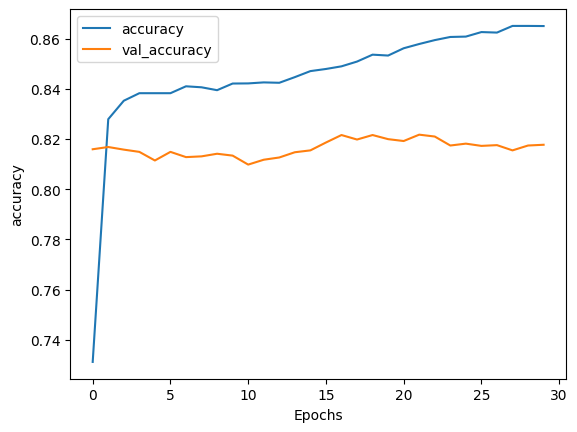

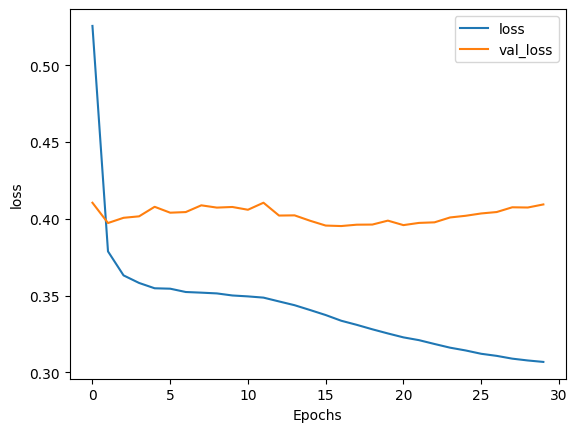

In [10]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Visualize Word Embeddings

In [11]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)


(1000, 16)


In [12]:
import io

# Open writeable files
out_v = io.open('tsv/sarcasm/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('tsv/sarcasm/meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

## Testing 

In [13]:
sarcasm_test = ["I like long walks, especially when they are taken by people who annoy me", "I am on a seafood diet. I see food and I eat it."]
# Convert the test text into sequences
sequences = tokenizer.texts_to_sequences(sarcasm_test)

# Pad the sequences
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Get the prediction
prediction = model.predict(padded)

print(prediction)

1/1 [==============================] - 0s 70ms/step
[[0.0996836 ]
 [0.00196201]]


In [14]:
model.save('../models/sarcasm/v1.h5')

c:\Users\guilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
